In [2]:
from traj2sim import *
import math
from mpl_toolkits import mplot3d
#%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt

from alive_progress import alive_bar

R = 4
r = 2
    
def torus_point(theta, phi, eta):
    return [math.cos(theta), math.sin(theta), math.cos(phi), math.sin(phi), math.cos(eta), math.sin(eta)]

n = 2
a = np.random.randn(n,n,n)
b = np.random.randn(n,n,n)

print(a)
#a = np.array([[ 0.89090698,  1.31282977], [-0.67674201, -1.17620531]])

def random_trig(theta, phi):
    return sum([sum([a[i,j]*np.cos((i+1)*theta)*np.sin((j+1)*phi) for i in range(n)]) for j in range(n)])

def trig_vf(tp):
    eta = tp[2]
    phi = tp[1]
    theta = tp[0]
    return np.array([sum([sum([sum([-a[i,j,k]*(i+1)*np.sin((i+1)*theta)*np.sin((j+1)*phi)*np.cos((k+1)*eta) for i in range(n)]) for j in range(n)]) for k in range(n)]),
            sum([sum([sum([a[i,j,k]*np.cos((i+1)*theta)*(j+1)*np.cos((j+1)*phi)*np.cos((k+1)*eta) for i in range(n)]) for j in range(n)]) for k in range(n)]),
                    sum([sum([sum([-a[i,j,k]*(k+1)*np.cos((i+1)*theta)*np.sin((j+1)*phi)*np.sin((k+1)*eta) for i in range(n)]) for j in range(n)]) for k in range(n)])])

[[[ 1.69336133 -0.06517927]
  [ 1.81393603  1.19488449]]

 [[-1.3523806  -0.05631259]
  [-0.03892831 -0.35068947]]]


In [3]:
def flow(init_tps):
    dt = 0.1
    num_steps = 25

    tps = np.empty((num_steps + 1, 3))  
    tps[0] = init_tps

    for i in range(num_steps):
        tps[i + 1] = tps[i] + trig_vf(tps[i]) * dt
    print()
    xyzs = np.empty((num_steps + 1, 7))  
    for i in range(num_steps+1):
        xyzs[i][0] = dt*i
        xyzs[i][1:] = torus_point(tps[i][0], tps[i][1], tps[i][2])

    xyz_coords = np.empty((num_steps+1, 6))
    for i in range(num_steps+1):
        xyz_coords[i] = xyzs[i][1:]
    return xyzs, xyz_coords


N = 512
sqrt_N = 8.00
xyzs = [0 for i in range(N)]
xyz_coords = [0 for i in range(N)]
for i in range(N):
    xyzs[i], xyz_coords[i] = flow((2*math.pi*int(i/sqrt_N)/sqrt_N, 2*math.pi*(i%int(sqrt_N))/sqrt_N, 2*math.pi*(i%int(sqrt_N))/sqrt_N))

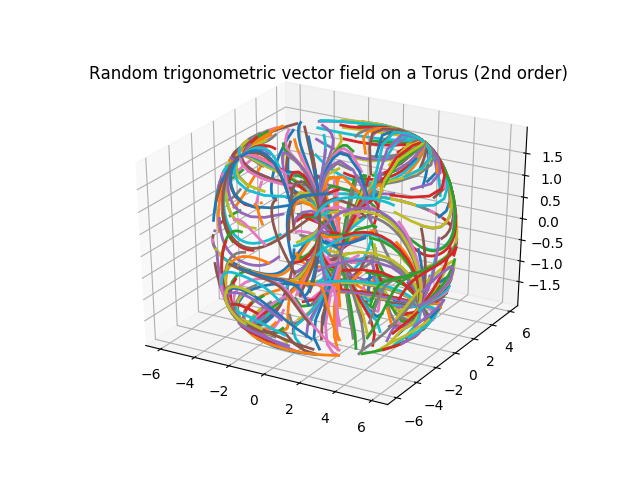

In [8]:
import matplotlib.pyplot as plt
ax = plt.figure().add_subplot(projection='3d')

for i in range(N):
    ax.plot(*xyz_coords[i].T, lw=2)
#ax.set_xlabel("X Axis")
#ax.set_ylabel("Y Axis")
#ax.set_zlabel("Z Axis")
ax.set_title("Random trigonometric vector field on a Torus (2nd order)")
plt.show()
traj_list = xyzs

In [4]:
#traj_list = list_traj
traj_list = xyzs
print('Trajectory shape before embedding:')
print(traj_list[0].shape)
#print(np.linalg.norm(traj_list[0][:,1:], axis=1))

def embedding(xyz):
    return xyz
    return np.hstack((xyz, 1*np.power(xyz/np.linalg.norm(xyz, axis=1, keepdims=True), 2*np.ones(xyz.shape)), 
                      1*np.power(xyz/np.linalg.norm(xyz, axis=1, keepdims=True), 3*np.ones(xyz.shape))))

                     
A = np.random.randn(1, 6)

print(A)
'''
A = [[ 0.36956572, -0.56530295, -0.08434743, -1.27003323, -0.34177907, -1.31266121, 0.08831102,  0.36965217,  0.83838318],
 [-1.46928237,  2.41508164, 2.59267909, -.69745742,-1.63944946,-0.05751269, -0.12781221,  0.19239181, 1.40852378],
 [ 0.18748471, -0.53227022,0.66637963, 0.92152638, 0.37343253, -0.14106446, -1.64379584, -0.58575294,  0.27286669]]
A = [[-0.50606406, -0.01208695, -0.77824182,  0.09250119, -0.26805318, -1.80277067,
   0.65785078, -1.50108459,  1.40912873]]
'''
'''
A = [[ 0.26091896, -1.41097101,  0.83429924,  0.29977495,  1.58207845,  0.14060155,
   0.36938206, -0.35587076, -1.62595019],
 [-1.1529032, 0.54976141,  1.58742566,  1.51749454,  0.409861, 0.03610766,
  -0.82956347, 0.84117888, -0.72650092]]
'''
project = False

def embed_and_project(xyz, project=True):
    if project == True:
        return np.matmul(A, embedding(xyz).T).T
    else:
        return embedding(xyz)
    
tlist_new = [0.0 for i in range(len(traj_list))]
for i in range(len(traj_list)):
    tlist_new[i] = np.hstack((np.reshape(traj_list[i][:,0],(traj_list[i][:,0].shape[0],1)), embed_and_project(traj_list[i][:,1:], project)))
#traj_list = tlist_new
if project == True:
    print('Trajectory shape after embedding and projecting:')
else:
    print('Trajectory shape after embedding:')

print(tlist_new[0].shape)
#print(np.linalg.norm(traj_list[0][:,1:], axis=1))
list_traj = tlist_new

Trajectory shape before embedding:
(26, 7)
[[-0.01313392  0.23426457 -0.2542356  -1.28251488  0.48467788 -0.61601957]]
Trajectory shape after embedding:
(26, 7)


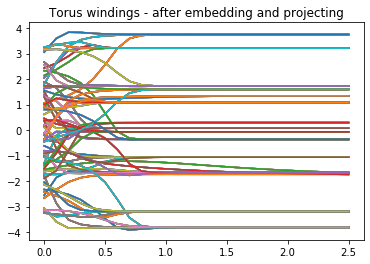

In [21]:
if project == True and list_traj[0].shape[1] > 2:
    ax = plt.figure().add_subplot(projection='3d')
    for i in range(0,len(list_traj)):
        ax.plot(*list_traj[i].T)
    ax.set_title("Torus windings - after embedding and projecting")
    plt.show()
    
elif project == True:
    ax = plt.figure().add_subplot()
    for i in range(0,len(list_traj)):
        ax.plot(*list_traj[i].T)
    ax.set_title("Torus windings - after embedding and projecting")
    plt.show()

In [5]:

t2s = Traj2Sim()

load=False

if load == False:
    t2s.set_trajectories(list_traj)
    t2s.compute_mssd(verbose=False)
    t2s.save_bifilt(filename='3d_grad_random_trig_512_bw2.npy')
if load == True:
    t2s.load_bifilt(filename='3d_grad_random_trig_512_bw2.npy')

|██▋                                     | ▂▄▆ 8563/130816 [7%] in 7:21 (19 ▆▄▂ 21/130816 [0%] in 1s (17.7/s▃▁▃ 29/130816 [0%] in 2s (17.4/s in 2s (17.9/s in 6s (18.0/ 132/130816 [0%] in 8s (17.6/(17.5/ in 11s (17.3246/130816 [0%] in 14s (17.2in 15s (17.3 ▇▅▃ 268/130816 [0%] in 15s (17.4 275/130816 [0%] in 16s (17.3 █▆▄ 297/130816 [0%] in 17s (17.4 351/130816 [0%] in 20s (17.4 in 20s (17.4 (17.4 (17.5in 23s (17.5 in 24s (17.6 (17.5 (17.5(17.6▄▆█ 464/130816 [0%] in 26s (17.6 in 27s (17.7 ▂▄▆ 493/130816 [0%] in 28s (17.7 (17.7558/130816 [0%] in 32s (17.6(17.6 584/130816 [0%] in 33s (17.6 ▃▅▇ 594/130816 [0%] in 34s (17.7in 39s (17.7 in 40s (17.8 722/130816 [1%] in 41s (17.8(17.9875/130816 [1%] in 48s (18.1930/130816 [1%] in 52s (18.1in 54s (18.1in 54s (18.11004/130816 [1%] in 55s (18.▃▅▇ 1014/130816 [1%] in 56s (18. 1017/130816 [1%] in 56s (18.1022/130816 [1%] in 56s (18. in 57s (18.(18.▃▁▃ 1114/130816 [1%] in 1:01 (18▂▂▄ 1118/130816 [1%] in 1:02 (181144/130816 [1%] in 1:03 (18 ▃▁▃ 1151/1

|█████▏                                  | ▆▄▂ 16808/130816 [13%] in 14:13 in 7:22 (198592/130816 [7%] in 7:22 (198619/130816 [7%] in 7:24 (19 8631/130816 [7%] in 7:24 (19▃▅▇ 8643/130816 [7%] in 7:25 (19 8654/130816 [7%] in 7:26 (19 ▇▅▃ 8658/130816 [7%] in 7:26 (19in 7:28 (19▃▅▇ 8717/130816 [7%] in 7:29 (19in 7:29 (19 (19▆█▆ 8807/130816 [7%] in 7:33 (19 ▆▄▂ 8853/130816 [7%] in 7:36 (19▄▂▂ 8859/130816 [7%] in 7:36 (19▅▃▁ 8900/130816 [7%] in 7:38 (19(19in 7:40 (19 (19 9080/130816 [7%] in 7:47 (19 (19 ▃▁▃ 9133/130816 [7%] in 7:49 (19(199139/130816 [7%] in 7:50 (19(19 in 7:54 (19in 7:54 (19 (19▇▇▅ 9244/130816 [7%] in 7:55 (19 in 7:55 (19 9272/130816 [7%] in 7:56 (19▃▅▇ 9276/130816 [7%] in 7:57 (19in 7:59 (19 (19▇▅▃ 9371/130816 [7%] in 8:01 (19in 8:02 (19 9401/130816 [7%] in 8:03 (19 in 8:03 (19 9428/130816 [7%] in 8:04 (199432/130816 [7%] in 8:04 (19 9440/130816 [7%] in 8:05 (199491/130816 [7%] in 8:07 (19 ▆█▆ 9499/130816 [7%] in 8:08 (19 ▇▇▅ 9503/130816 [7%] in 8:08 (19in 8:10 (19 in 8:11

|███████▌                                | ▅▇▇ 24392/130816 [19%] in 20:34  in 14:14 16858/130816 [13%] in 14:16 16892/130816 [13%] in 14:18 16896/130816 [13%] in 14:18  █▆▄ 16963/130816 [13%] in 14:21  in 14:22  ▇▅▃ 17001/130816 [13%] in 14:23  in 14:25 17044/130816 [13%] in 14:25  in 14:26  in 14:27  17081/130816 [13%] in 14:27  ▅▃▁ 17089/130816 [13%] in 14:28  17101/130816 [13%] in 14:28  in 14:29  in 14:30  ▃▁▃ 17164/130816 [13%] in 14:32   ▃▁▃ 17201/130816 [13%] in 14:33 in 14:34 ▆█▆ 17223/130816 [13%] in 14:35  ▇▇▅ 17227/130816 [13%] in 14:35 in 14:35  ▄▂▂ 17242/130816 [13%] in 14:36 17248/130816 [13%] in 14:36  in 14:37   in 14:39  █▆▄ 17313/130816 [13%] in 14:39  in 14:40  in 14:41 in 14:42  17372/130816 [13%] in 14:42 ▃▁▃ 17406/130816 [13%] in 14:44  17442/130816 [13%] in 14:46  17472/130816 [13%] in 14:47 in 14:48   17543/130816 [13%] in 14:51  █▆▄ 17547/130816 [13%] in 14:51   17583/130816 [13%] in 14:53 in 14:53 17590/130816 [13%] in 14:53 ▆█▆ 17619/130816 [13%] in 14:55 ▃▁

|██████████                              | █▆▄ 32573/130816 [25%] in 27:23 ▇▇▅ 24401/130816 [19%] in 20:35  in 20:36  in 20:37 in 20:38  ▁▃▅ 24504/130816 [19%] in 20:40 in 20:41   ▂▄▆ 24575/130816 [19%] in 20:43 in 20:47 24656/130816 [19%] in 20:48 in 20:48  24701/130816 [19%] in 20:50  24703/130816 [19%] in 20:50 ▆▄▂ 24715/130816 [19%] in 20:50  █▆▄ 24746/130816 [19%] in 20:52 24750/130816 [19%] in 20:52 ▇▇▅ 24781/130816 [19%] in 20:54 ▁▃▅ 24844/130816 [19%] in 20:57 ▄▂▂ 24873/130816 [19%] in 20:58  24877/130816 [19%] in 20:58 in 21:00  24912/130816 [19%] in 21:00  24921/130816 [19%] in 21:01  24926/130816 [19%] in 21:01  in 21:03  ▄▆█ 25041/130816 [19%] in 21:06 ▅▇▇ 25045/130816 [19%] in 21:07 in 21:07 25059/130816 [19%] in 21:07 ▂▄▆ 25077/130816 [19%] in 21:08  ▂▂▄ 25108/130816 [19%] in 21:10 25143/130816 [19%] in 21:11 in 21:13 in 21:15  ▃▁▃ 25220/130816 [19%] in 21:15  ▄▆█ 25235/130816 [19%] in 21:16  ▆█▆ 25280/130816 [19%] in 21:18   ▂▂▄ 25338/130816 [19%] in 21:21  in 21:21  ▅▇▇

|████████████▏                           | ▅▇▇ 39721/130816 [30%] in 33:22 ▅▃▁ 32585/130816 [25%] in 27:24  ▅▇▇ 32645/130816 [25%] in 27:27 ▁▃▅ 32673/130816 [25%] in 27:28  in 27:29 32689/130816 [25%] in 27:29 32701/130816 [25%] in 27:30 ▃▁▃ 32707/130816 [25%] in 27:30  in 27:31 32733/130816 [25%] in 27:31  in 27:32  32754/130816 [25%] in 27:32  ▂▄▆ 32761/130816 [25%] in 27:33 █▆▄ 32779/130816 [25%] in 27:34 in 27:34   32837/130816 [25%] in 27:37 ▄▂▂ 32841/130816 [25%] in 27:37  32860/130816 [25%] in 27:38  32928/130816 [25%] in 27:41 ▇▇▅ 32938/130816 [25%] in 27:42   ▆█▆ 32969/130816 [25%] in 27:43  in 27:44  ▄▂▂ 32988/130816 [25%] in 27:44 ▅▇▇ 33006/130816 [25%] in 27:45  ▆█▆ 33008/130816 [25%] in 27:45 ▇▇▅ 33010/130816 [25%] in 27:45  in 27:46  ▂▄▆ 33034/130816 [25%] in 27:47   ▆▄▂ 33096/130816 [25%] in 27:50  33122/130816 [25%] in 27:51  33127/130816 [25%] in 27:52 33181/130816 [25%] in 27:55  in 27:58 33257/130816 [25%] in 27:59 in 27:59  █▆▄ 33301/130816 [25%] in 28:01 33307/1308

|██████████████▍                         | ▄▆█ 47212/130816 [36%] in 39:37  ▄▂▂ 39857/130816 [30%] in 33:29 39869/130816 [30%] in 33:30  in 33:30 ▆▄▂ 39890/130816 [30%] in 33:31  39899/130816 [31%] in 33:31 █▆▄ 39927/130816 [31%] in 33:33  ▇▇▅ 39958/130816 [31%] in 33:34 ▇▅▃ 39966/130816 [31%] in 33:35 in 33:36 40036/130816 [31%] in 33:38  40039/130816 [31%] in 33:38 in 33:39 in 33:39  in 33:40  ▃▁▃ 40096/130816 [31%] in 33:41  in 33:46  in 33:47 ▇▇▅ 40233/130816 [31%] in 33:48 █▆▄ 40238/130816 [31%] in 33:48  ▃▁▃ 40324/130816 [31%] in 33:52  ▁▃▅ 40329/130816 [31%] in 33:53  in 33:53 in 33:53 40358/130816 [31%] in 33:54 ▆▄▂ 40398/130816 [31%] in 33:56  40408/130816 [31%] in 33:57 in 33:58 40470/130816 [31%] in 34:00  ▅▃▁ 40474/130816 [31%] in 34:00 in 34:00  40489/130816 [31%] in 34:01   in 34:03 ▇▅▃ 40550/130816 [31%] in 34:04  ▃▅▇ 40608/130816 [31%] in 34:06 40611/130816 [31%] in 34:07  40677/130816 [31%] in 34:10 40705/130816 [31%] in 34:11  in 34:12 40714/130816 [31%] in 34:12  in 

|█████████████████                       | ▅▇▇ 55637/130816 [43%] in 46:39  ▇▅▃ 47226/130816 [36%] in 39:38   in 39:39  ▄▆█ 47252/130816 [36%] in 39:39  in 39:40  ▅▇▇ 47299/130816 [36%] in 39:42   ▁▃▅ 47330/130816 [36%] in 39:43  ▂▄▆ 47334/130816 [36%] in 39:43 47343/130816 [36%] in 39:44  ▃▁▃ 47441/130816 [36%] in 39:49 ▂▂▄ 47445/130816 [36%] in 39:49  47547/130816 [36%] in 39:54   in 39:57  47611/130816 [36%] in 39:57 47624/130816 [36%] in 39:58  in 40:01  ▇▅▃ 47741/130816 [36%] in 40:04 ▃▅▇ 47767/130816 [37%] in 40:05  in 40:08  47848/130816 [37%] in 40:09 47852/130816 [37%] in 40:09   ▃▁▃ 47871/130816 [37%] in 40:10 in 40:11 ▅▇▇ 47890/130816 [37%] in 40:11 ▃▁▃ 47953/130816 [37%] in 40:14 47959/130816 [37%] in 40:15 █▆▄ 47979/130816 [37%] in 40:16  in 40:16 ▄▂▂ 47991/130816 [37%] in 40:16  ▁▃▅ 48036/130816 [37%] in 40:19   48069/130816 [37%] in 40:20 in 40:22 ▅▃▁ 48131/130816 [37%] in 40:23 48158/130816 [37%] in 40:25  ▆█▆ 48163/130816 [37%] in 40:25 48166/130816 [37%] in 40:25 4817

|███████████████████▌                    | ▇▇▅ 63701/130816 [49%] in 53:22  55681/130816 [43%] in 46:41  in 46:42  55710/130816 [43%] in 46:43 55731/130816 [43%] in 46:44 in 46:44  in 46:49 in 46:49  in 46:49 █▆▄ 55847/130816 [43%] in 46:50  ▇▅▃ 55851/130816 [43%] in 46:50 ▄▆█ 55876/130816 [43%] in 46:51 in 46:52  55903/130816 [43%] in 46:53  ▂▂▄ 55979/130816 [43%] in 46:56  in 46:57 ▅▃▁ 56051/130816 [43%] in 47:00 ▄▆█ 56069/130816 [43%] in 47:01 56117/130816 [43%] in 47:03   56154/130816 [43%] in 47:05 56167/130816 [43%] in 47:06  ▃▁▃ 56183/130816 [43%] in 47:06  56195/130816 [43%] in 47:07  ▄▆█ 56244/130816 [43%] in 47:09  56250/130816 [43%] in 47:10 56253/130816 [43%] in 47:10   █▆▄ 56331/130816 [43%] in 47:14 ▅▃▁ 56339/130816 [43%] in 47:14  ▅▇▇ 56361/130816 [43%] in 47:15  56365/130816 [43%] in 47:15 56432/130816 [43%] in 47:19 ▆█▆ 56435/130816 [43%] in 47:19  ▂▂▄ 56456/130816 [43%] in 47:20   in 47:22  56500/130816 [43%] in 47:22  ▇▅▃ 56518/130816 [43%] in 47:23  in 47:23  56567/

|██████████████████████                  | ▇▅▃ 71902/130816 [55%] in 1:00:263711/130816 [49%] in 53:23  in 53:24 ▂▄▆ 63732/130816 [49%] in 53:24  63749/130816 [49%] in 53:25  in 53:25  in 53:25  in 53:26   63874/130816 [49%] in 53:31 63904/130816 [49%] in 53:32  63908/130816 [49%] in 53:33 in 53:33  63942/130816 [49%] in 53:34  63973/130816 [49%] in 53:36  63993/130816 [49%] in 53:37 64009/130816 [49%] in 53:38  64017/130816 [49%] in 53:38 ▅▇▇ 64095/130816 [49%] in 53:42  ▄▆█ 64170/130816 [49%] in 53:46  64204/130816 [49%] in 53:48 in 53:49 in 53:51 ▅▃▁ 64307/130816 [49%] in 53:53  in 53:55 in 53:56  64413/130816 [49%] in 53:58  ▅▇▇ 64446/130816 [49%] in 54:00 in 54:01  in 54:01  ▄▂▂ 64506/130816 [49%] in 54:03 64550/130816 [49%] in 54:05 in 54:07  in 54:12 in 54:14  64776/130816 [50%] in 54:16 ▅▃▁ 64799/130816 [50%] in 54:17 ▂▂▄ 64807/130816 [50%] in 54:18 in 54:18 ▆█▆ 64828/130816 [50%] in 54:19  ▅▇▇ 64868/130816 [50%] in 54:21 64915/130816 [50%] in 54:23  ▃▅▇ 64944/130816 [50%] in 5

|████████████████████████▋               | ▁▃▅ 80660/130816 [62%] in 1:07:4 in 1:00:2▇▅▃ 71947/130816 [55%] in 1:00:2 in 1:00:2▆█▆ 72024/130816 [55%] in 1:00:272055/130816 [55%] in 1:00:3 72089/130816 [55%] in 1:00:372123/130816 [55%] in 1:00:3▃▅▇ 72145/130816 [55%] in 1:00:3 ▄▆█ 72149/130816 [55%] in 1:00:3▄▆█ 72186/130816 [55%] in 1:00:3 █▆▄ 72196/130816 [55%] in 1:00:372203/130816 [55%] in 1:00:3 in 1:00:3 72225/130816 [55%] in 1:00:3 72413/130816 [55%] in 1:00:4▇▇▅ 72458/130816 [55%] in 1:00:572475/130816 [55%] in 1:00:5 ▃▁▃ 72478/130816 [55%] in 1:00:5in 1:00:572499/130816 [55%] in 1:00:5 72517/130816 [55%] in 1:00:5▁▃▅ 72522/130816 [55%] in 1:00:572529/130816 [55%] in 1:00:5 72545/130816 [55%] in 1:00:572549/130816 [55%] in 1:00:5 ▇▅▃ 72610/130816 [56%] in 1:00:5 ▆▄▂ 72614/130816 [56%] in 1:00:5in 1:01:0 ▃▁▃ 72698/130816 [56%] in 1:01:0 ▅▇▇ 72714/130816 [56%] in 1:01:0 72717/130816 [56%] in 1:01:0in 1:01:0 in 1:01:072852/130816 [56%] in 1:01:1 in 1:01:172860/130816 [56%] in 1:01:

|███████████████████████████▍            | ▃▅▇ 89703/130816 [69%] in 1:15:1 80670/130816 [62%] in 1:07:4 80681/130816 [62%] in 1:07:4▆▄▂ 80689/130816 [62%] in 1:07:480766/130816 [62%] in 1:07:4 ▂▂▄ 80780/130816 [62%] in 1:07:4 in 1:07:4in 1:07:5 in 1:07:580979/130816 [62%] in 1:07:581010/130816 [62%] in 1:07:5 ▂▂▄ 81014/130816 [62%] in 1:07:5▃▅▇ 81022/130816 [62%] in 1:07:5 in 1:08:0 81061/130816 [62%] in 1:08:081069/130816 [62%] in 1:08:0 in 1:08:081078/130816 [62%] in 1:08:0▆▄▂ 81123/130816 [62%] in 1:08:081162/130816 [62%] in 1:08:0▁▃▅ 81178/130816 [62%] in 1:08:0 ▅▇▇ 81386/130816 [62%] in 1:08:1 in 1:08:181439/130816 [62%] in 1:08:281442/130816 [62%] in 1:08:2in 1:08:2 ▄▆█ 81462/130816 [62%] in 1:08:281480/130816 [62%] in 1:08:2 in 1:08:2 81563/130816 [62%] in 1:08:2 ▃▅▇ 81577/130816 [62%] in 1:08:2 ▅▇▇ 81582/130816 [62%] in 1:08:2 ▆█▆ 81586/130816 [62%] in 1:08:2 in 1:08:2▃▁▃ 81649/130816 [62%] in 1:08:3 81712/130816 [62%] in 1:08:3 81715/130816 [62%] in 1:08:3 81744/130816 [62%] 

|██████████████████████████████          | ▁▃▅ 98091/130816 [75%] in 1:22:0in 1:15:1 ▆▄▂ 89802/130816 [69%] in 1:15:1 ▃▅▇ 89895/130816 [69%] in 1:15:2 89959/130816 [69%] in 1:15:2 89986/130816 [69%] in 1:15:2 █▆▄ 89990/130816 [69%] in 1:15:2 in 1:15:2 in 1:15:2in 1:15:2in 1:15:290031/130816 [69%] in 1:15:290056/130816 [69%] in 1:15:2 ▆█▆ 90060/130816 [69%] in 1:15:2 90095/130816 [69%] in 1:15:3▁▃▅ 90159/130816 [69%] in 1:15:3 in 1:15:3 in 1:15:3in 1:15:3 in 1:15:4 90292/130816 [69%] in 1:15:4▇▇▅ 90296/130816 [69%] in 1:15:4in 1:15:4 in 1:15:490378/130816 [69%] in 1:15:4 ▃▁▃ 90395/130816 [69%] in 1:15:4in 1:15:4 ▅▃▁ 90514/130816 [69%] in 1:15:5▂▂▄ 90521/130816 [69%] in 1:15:5in 1:15:5in 1:15:5 90656/130816 [69%] in 1:15:590669/130816 [69%] in 1:15:590703/130816 [69%] in 1:16:0▃▅▇ 90729/130816 [69%] in 1:16:0 90755/130816 [69%] in 1:16:090775/130816 [69%] in 1:16:0in 1:16:0 90802/130816 [69%] in 1:16:090865/130816 [69%] in 1:16:0in 1:16:1 ▄▂▂ 90908/130816 [69%] in 1:16:1 ▂▄▆ 90999/130816

|████████████████████████████████▉       | ▄▆█ 107432/130816 [82%] in 1:29: in 1:22:1in 1:22:1in 1:22:1in 1:22:198220/130816 [75%] in 1:22:1 98232/130816 [75%] in 1:22:1 ▅▇▇ 98236/130816 [75%] in 1:22:1 ▇▇▅ 98242/130816 [75%] in 1:22:1█▆▄ 98247/130816 [75%] in 1:22:1 ▆▄▂ 98252/130816 [75%] in 1:22:1in 1:22:1 98284/130816 [75%] in 1:22:1 98299/130816 [75%] in 1:22:1 98334/130816 [75%] in 1:22:2 98338/130816 [75%] in 1:22:2▁▃▅ 98344/130816 [75%] in 1:22:2 ▇▇▅ 98398/130816 [75%] in 1:22:2 ▃▅▇ 98425/130816 [75%] in 1:22:2in 1:22:2▄▂▂ 98453/130816 [75%] in 1:22:2in 1:22:2 ▆█▆ 98517/130816 [75%] in 1:22:3▇▇▅ 98520/130816 [75%] in 1:22:3 in 1:22:3▅▇▇ 98555/130816 [75%] in 1:22:3 98573/130816 [75%] in 1:22:3▇▅▃ 98606/130816 [75%] in 1:22:3in 1:22:3in 1:22:3 98644/130816 [75%] in 1:22:3in 1:22:3 in 1:22:3▂▄▆ 98712/130816 [75%] in 1:22:4▄▂▂ 98737/130816 [75%] in 1:22:4 98745/130816 [75%] in 1:22:4 ▄▆█ 98756/130816 [75%] in 1:22:498775/130816 [76%] in 1:22:498807/130816 [76%] in 1:22:4 98835/1308

|███████████████████████████████████▌    | ▆█▆ 116022/130816 [89%] in 1:37: in 1:29:▂▄▆ 107467/130816 [82%] in 1:29: █▆▄ 107484/130816 [82%] in 1:29: 107502/130816 [82%] in 1:30: 107512/130816 [82%] in 1:30:in 1:30: in 1:30:in 1:30:▂▄▆ 107581/130816 [82%] in 1:30: ▃▁▃ 107612/130816 [82%] in 1:30:in 1:30:in 1:30:107790/130816 [82%] in 1:30:in 1:30: in 1:30: in 1:30:in 1:30:107957/130816 [83%] in 1:30:▆█▆ 107980/130816 [83%] in 1:30: ▄▂▂ 107999/130816 [83%] in 1:30:108119/130816 [83%] in 1:30:in 1:30:▂▂▄ 108239/130816 [83%] in 1:30: 108250/130816 [83%] in 1:30: 108255/130816 [83%] in 1:30: in 1:30: 108271/130816 [83%] in 1:30: 108287/130816 [83%] in 1:30:▄▆█ 108291/130816 [83%] in 1:30: 108298/130816 [83%] in 1:30:108323/130816 [83%] in 1:30: ▇▅▃ 108384/130816 [83%] in 1:30: ▄▆█ 108442/130816 [83%] in 1:30:▇▅▃ 108454/130816 [83%] in 1:30: in 1:30:▅▇▇ 108520/130816 [83%] in 1:30: in 1:30:108552/130816 [83%] in 1:30: in 1:30:▃▁▃ 108657/130816 [83%] in 1:30: 108674/130816 [83%] in 1:30:1087

|██████████████████████████████████████▍ | ▃▅▇ 125292/130816 [96%] in 1:44: ▄▂▂ 116037/130816 [89%] in 1:37: in 1:37: ▅▇▇ 116057/130816 [89%] in 1:37:▅▃▁ 116077/130816 [89%] in 1:37:in 1:37: in 1:37:▄▆█ 116258/130816 [89%] in 1:37:116288/130816 [89%] in 1:37:in 1:37:in 1:37: ▃▅▇ 116339/130816 [89%] in 1:37:116375/130816 [89%] in 1:37: ▇▅▃ 116396/130816 [89%] in 1:37:in 1:37:▆█▆ 116428/130816 [89%] in 1:37:in 1:37:116443/130816 [89%] in 1:37:116479/130816 [89%] in 1:37:in 1:37: 116522/130816 [89%] in 1:37: ▅▃▁ 116531/130816 [89%] in 1:37:in 1:37:in 1:37: ▄▂▂ 116744/130816 [89%] in 1:37: ▂▄▆ 116755/130816 [89%] in 1:37: 116770/130816 [89%] in 1:37:in 1:37:116833/130816 [89%] in 1:37: ▂▂▄ 116871/130816 [89%] in 1:37:116882/130816 [89%] in 1:37: ▅▃▁ 116900/130816 [89%] in 1:37: █▆▄ 116933/130816 [89%] in 1:37: ▂▄▆ 116952/130816 [89%] in 1:37: 116975/130816 [89%] in 1:37: in 1:37: ▄▂▂ 117013/130816 [89%] in 1:37:117031/130816 [89%] in 1:37:117039/130816 [89%] in 1:37: 117054/130816 [89%] in

|████████████████████████████████████████| 130816/130816 [100%] in 1:48:57.125336/130816 [96%] in 1:44: 125373/130816 [96%] in 1:44:125377/130816 [96%] in 1:44:▄▂▂ 125398/130816 [96%] in 1:44: ▂▂▄ 125405/130816 [96%] in 1:44: in 1:44: 125471/130816 [96%] in 1:44: ▃▅▇ 125498/130816 [96%] in 1:44:▅▇▇ 125506/130816 [96%] in 1:44:▆█▆ 125509/130816 [96%] in 1:44:125513/130816 [96%] in 1:44: ▅▃▁ 125526/130816 [96%] in 1:44:▁▃▅ 125610/130816 [96%] in 1:45:▄▆█ 125621/130816 [96%] in 1:45: 125691/130816 [96%] in 1:45:in 1:45:▅▃▁ 125712/130816 [96%] in 1:45: 125714/130816 [96%] in 1:45: in 1:45:125750/130816 [96%] in 1:45: in 1:45: ▃▁▃ 125798/130816 [96%] in 1:45:125827/130816 [96%] in 1:45:in 1:45: 125863/130816 [96%] in 1:45: ▆▄▂ 125871/130816 [96%] in 1:45:▆▄▂ 125912/130816 [96%] in 1:45:in 1:45: 126009/130816 [96%] in 1:45: ▆█▆ 126103/130816 [96%] in 1:45: 126106/130816 [96%] in 1:45:in 1:45:126177/130816 [96%] in 1:45:126185/130816 [96%] in 1:45: 126202/130816 [96%] in 1:45:in 1:45: in 1:45

(26, 512, 512)


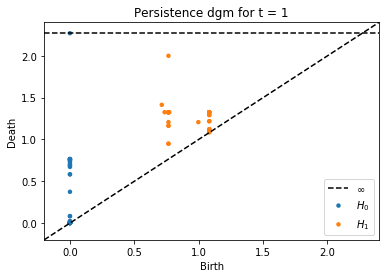

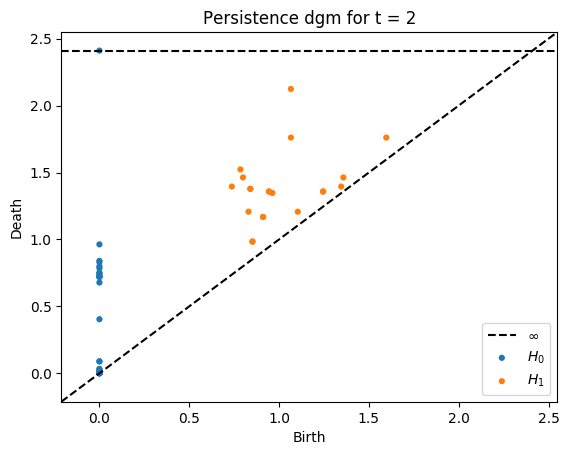

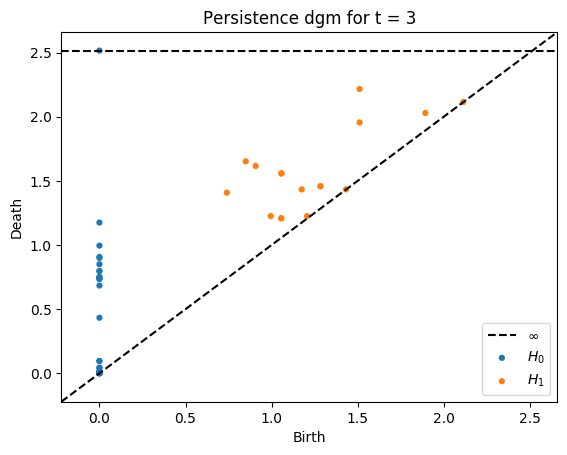

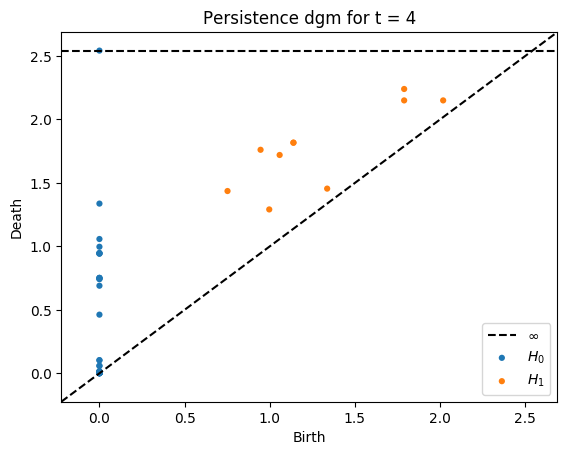

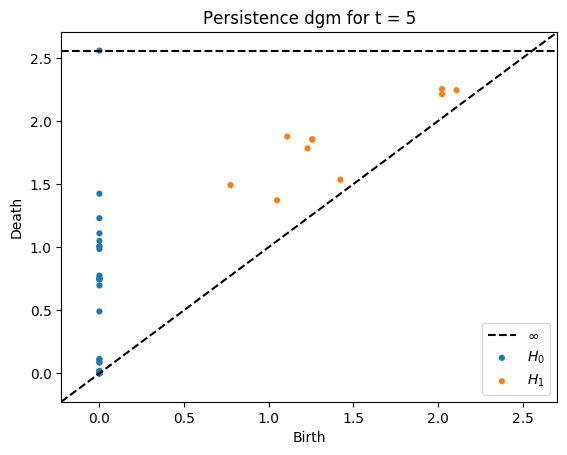

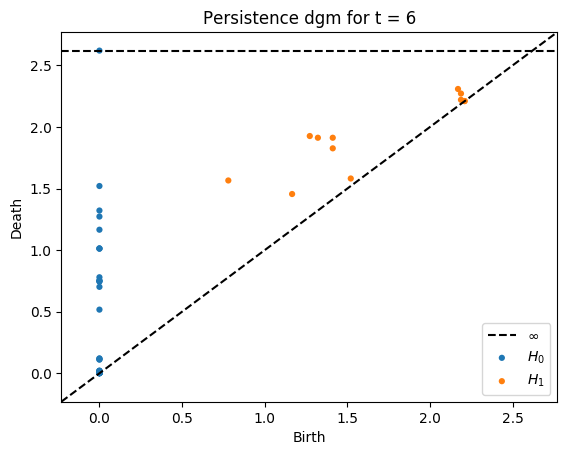

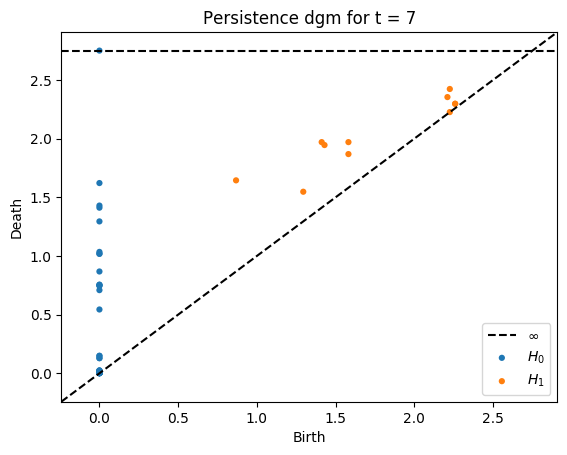

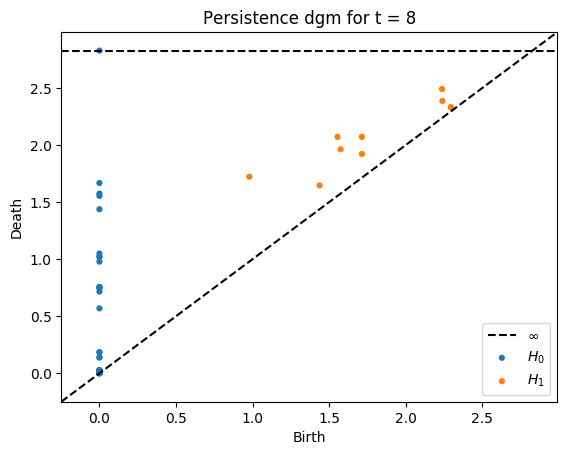

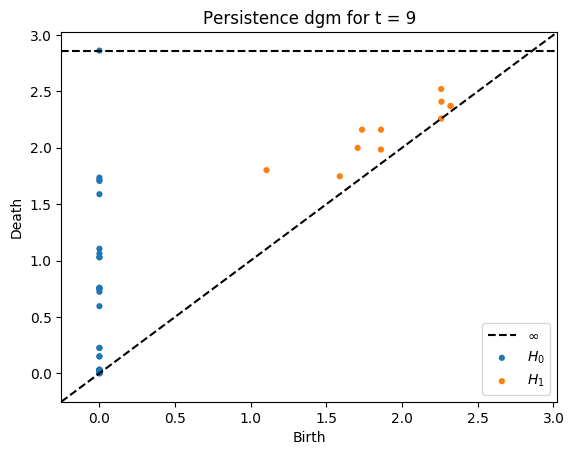

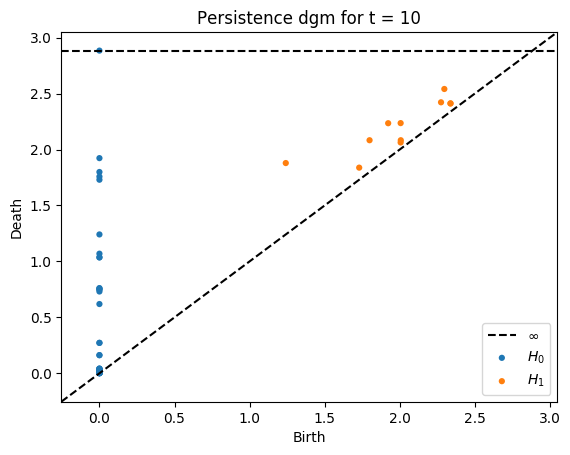

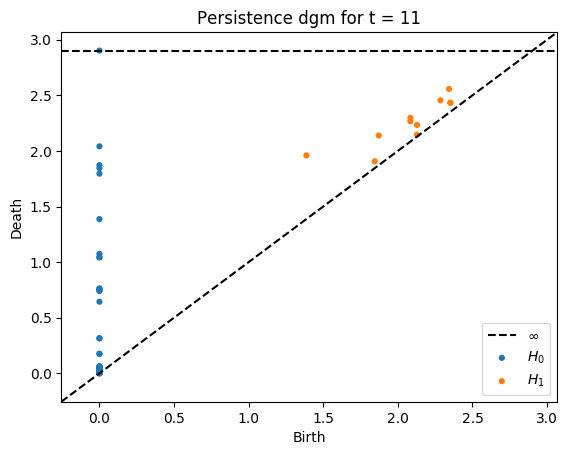

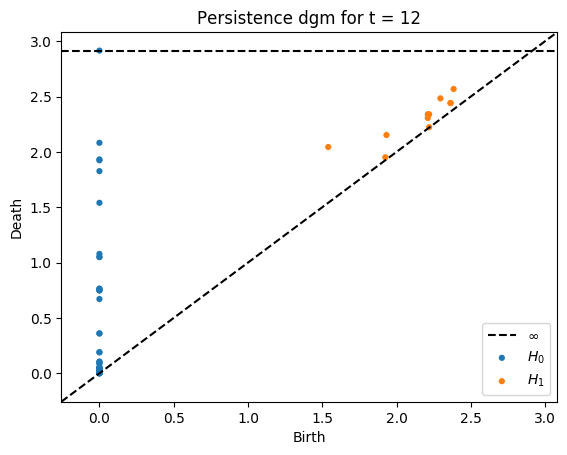

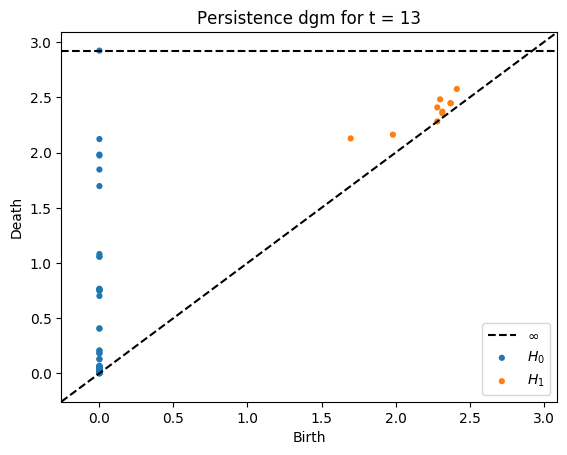

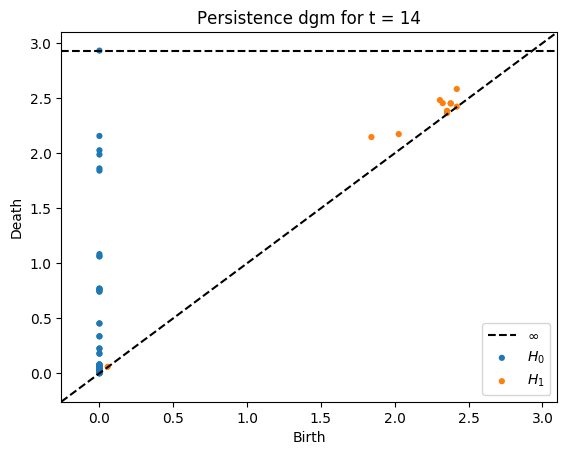

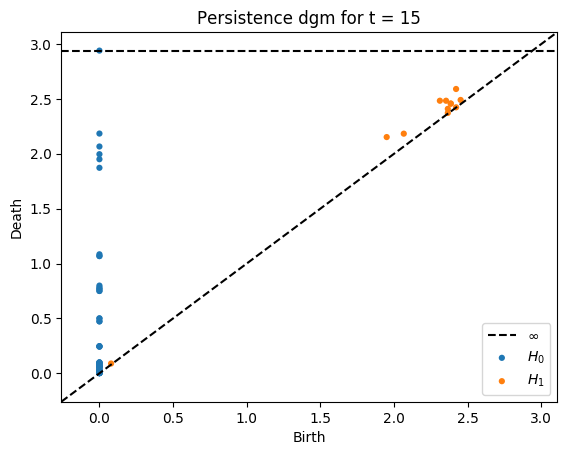

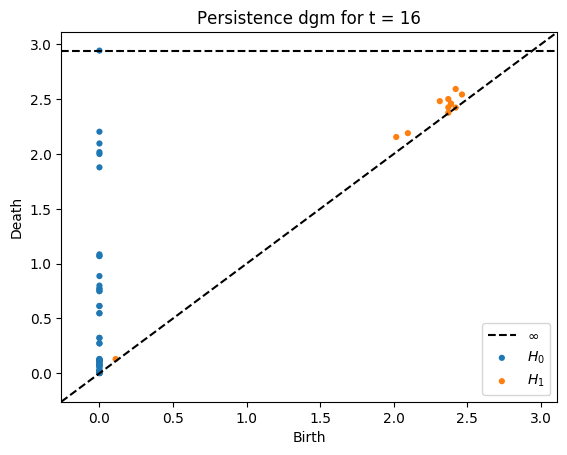

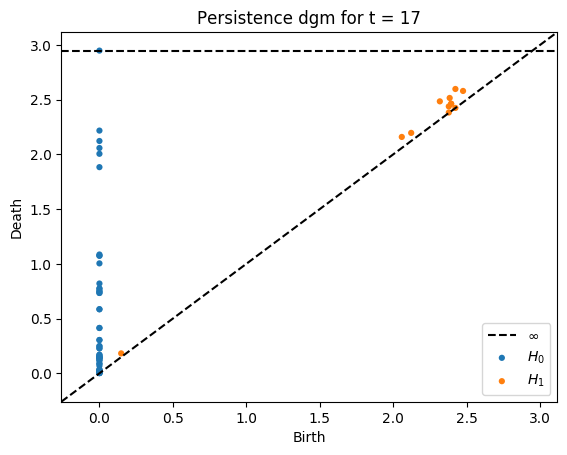

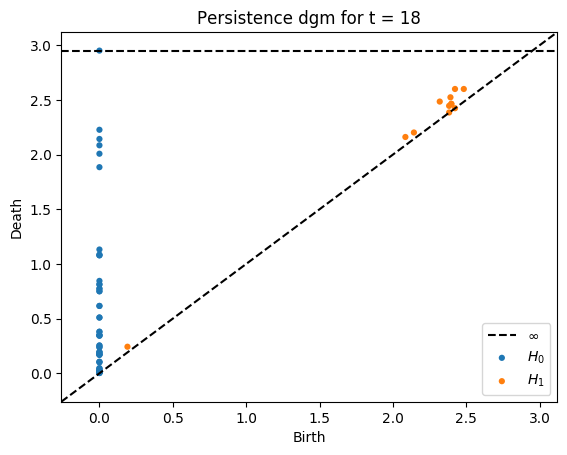

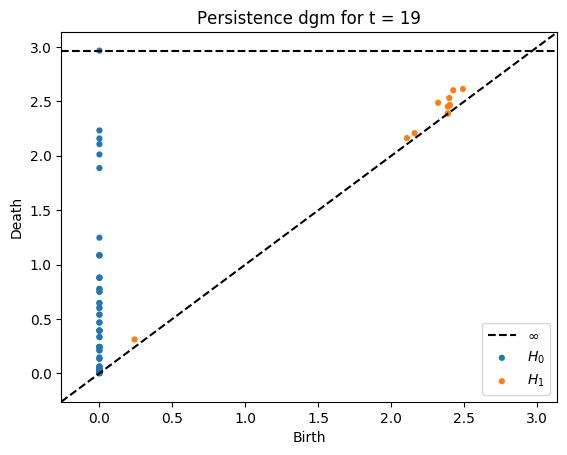

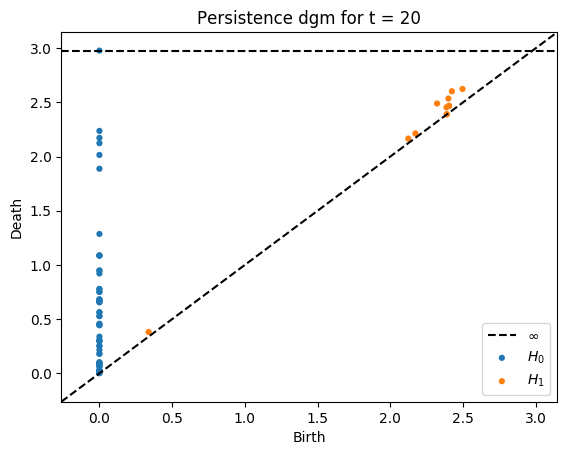

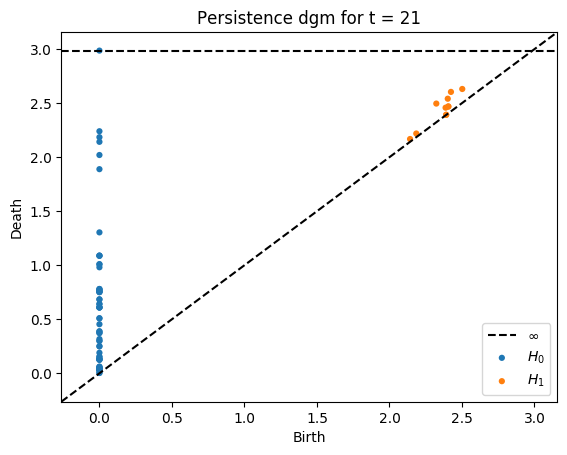

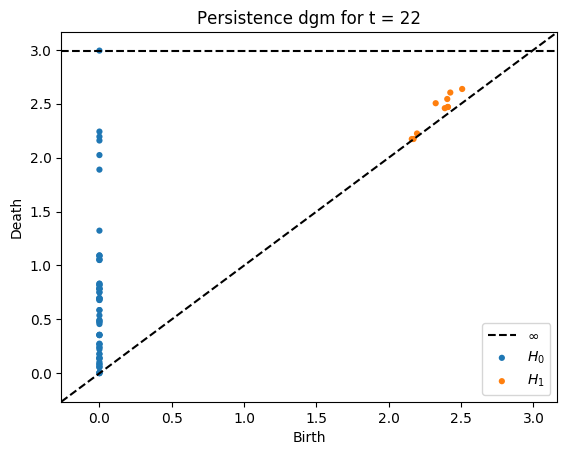

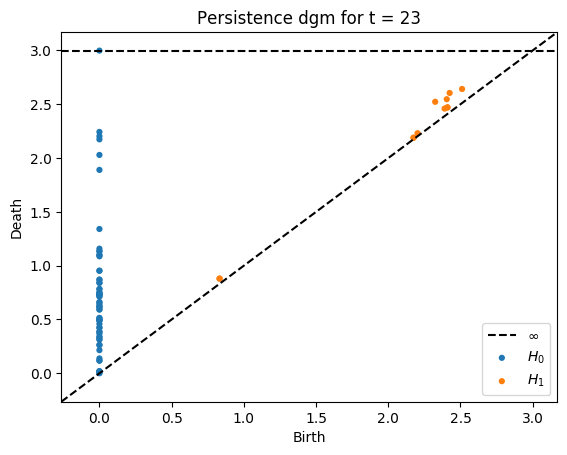

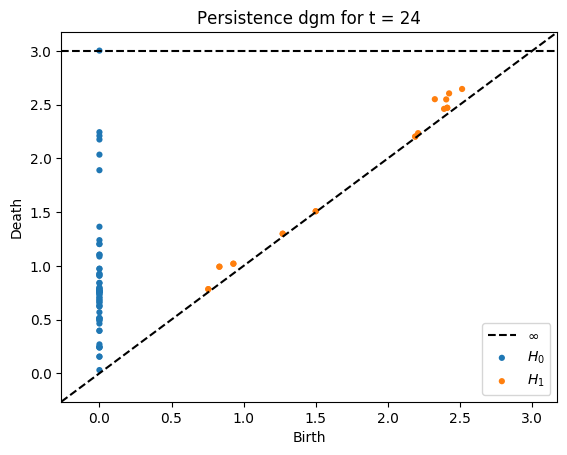

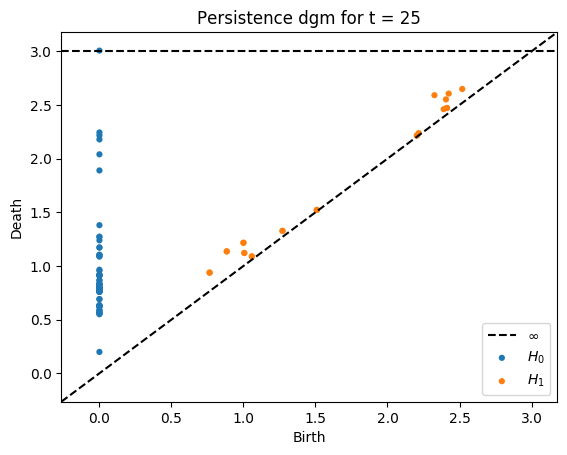

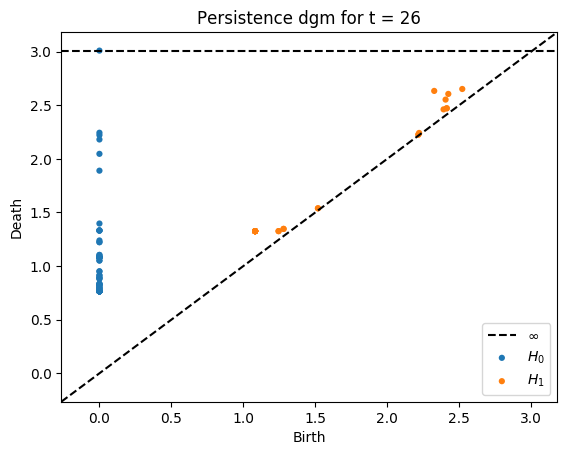

In [7]:
from ripser import ripser
from sklearn import datasets
from persim import plot_diagrams
%matplotlib inline

print(t2s.bifilt.shape)

for i in range(t2s.bifilt.shape[0]):
    dgms = ripser(t2s.bifilt[i,:,:], distance_matrix=True, maxdim=1)['dgms']
    plt.clf()
    plt.title('Persistence dgm for t = '+ str(i+1))
    plot_diagrams(dgms, show = True)